<b>Load data and convert variables to proper types</b>

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
df = pd.read_csv('Secrets_Quasi_2023.csv')

In [2]:
# Get a list of variables (columns)
variables = df.columns.tolist()
print(variables)
#check the datatypes
data_types = df.dtypes
print(data_types)
#CONVERT TO THE RELEVANT TYPE
columns_to_convert = ['Facebook', 'Brand', 'Franchise', 'Sales', 'Reviews']
df[columns_to_convert] = df[columns_to_convert].astype(int)
df['Genre'] = df['Genre'].astype('category')
df['Publisher'] = df['Publisher'].astype('category')

['Name', 'Rating', 'Price', 'Userscore', 'User_Reviews', 'Publisher', 'Facebook', 'Brand', 'Franchise', 'Sales', 'Reviews', 'S_Positive', 'Beta', 'Week1', 'Week2', 'Week3', 'Week4', 'Week5', 'Week6', 'Week7', 'Week8', 'Week9', 'Week10', 'ReleaseDate', 'Website', 'Genre', 'BetaStart', 'Beta_Source', 'Developer']
Name             object
Rating          float64
Price           float64
Userscore       float64
User_Reviews    float64
Publisher        object
Facebook          int64
Brand             int64
Franchise         int64
Sales             int64
Reviews           int64
S_Positive        int64
Beta              int64
Week1           float64
Week2           float64
Week3           float64
Week4           float64
Week5           float64
Week6           float64
Week7           float64
Week8           float64
Week9           float64
Week10          float64
ReleaseDate      object
Website          object
Genre            object
BetaStart        object
Beta_Source      object
Developer      

In [3]:
#checking for missing values (11 missing in Rating cant be used for instruments)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          339 non-null    object  
 1   Rating        330 non-null    float64 
 2   Price         339 non-null    float64 
 3   Userscore     299 non-null    float64 
 4   User_Reviews  299 non-null    float64 
 5   Publisher     339 non-null    category
 6   Facebook      339 non-null    int64   
 7   Brand         339 non-null    int64   
 8   Franchise     339 non-null    int64   
 9   Sales         339 non-null    int64   
 10  Reviews       339 non-null    int64   
 11  S_Positive    339 non-null    int64   
 12  Beta          339 non-null    int64   
 13  Week1         195 non-null    float64 
 14  Week2         198 non-null    float64 
 15  Week3         201 non-null    float64 
 16  Week4         205 non-null    float64 
 17  Week5         211 non-null    float64 
 18  Week6     

<b>Create Year and Season dummies then resave</b>

In [4]:
# Step 1: Convert ReleaseDate to datetime
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], format='%m/%d/%Y')
df['Month'] = df['ReleaseDate'].dt.month
df['Year'] = df['ReleaseDate'].dt.year

# Define seasons
df['Season'] = pd.cut(df['Month'],
                      bins=[0, 3, 6, 9, 12],
                      labels=['Winter', 'Spring', 'Summer', 'Fall'])

# Create dummies for the Year and Season columns
season_dummies = pd.get_dummies(df['Season'], prefix='Season', drop_first=True).astype(int)
# Step 4: Concatenate season dummies to the main dataframe
df = pd.concat([df, season_dummies], axis=1)
df['Year_Dummy'] = (df['Year'] == 2018).astype(int)
# Drop the 'Month', 'Year' and 'Season' columns if they are no longer needed
df.drop(['Month', 'Season', 'Year'], axis=1, inplace=True)
# Save the DataFrame as a .csv file
#df.to_csv('Secrets_Quasi_2023v2.csv', index=False)

<B>Table 2 Summary of dependent variables</b>

In [5]:
# Calculate summary statistics and round them to two decimal places for TABLE 1
summary_stats = df[['Sales', 'Reviews', 'Rating', 'Price']].describe().round(2)
# Print the summary statistics
print('Table 1. Summary of dependent variables')
print(summary_stats)

Table 1. Summary of dependent variables
            Sales   Reviews  Rating   Price
count      339.00    339.00  330.00  339.00
mean    266153.39   3749.82   74.64   28.49
std     286709.50   5317.09    8.93   15.77
min      22000.00     66.00   38.00    2.99
25%      79000.00    788.50   70.00   14.99
50%     167000.00   1695.00   76.00   19.99
75%     324000.00   4356.00   80.00   39.99
max    1582000.00  31566.00   92.00   59.99


In [6]:
#beta_counts = df['Beta'].value_counts().reset_index()
#print(beta_counts)

#create binary variables for open and closed beta testing: Early Access = 2 counts as open
df['closed'] = df['Beta'].apply(lambda x: 1 if x == 1  else 0)
df['open'] = df['Beta'].apply(lambda x: 1 if x in [2, 3] else 0)
closed_counts = df['closed'].value_counts().reset_index()
open_counts = df['open'].value_counts().reset_index()
# Print the summary table
beta_table = pd.merge(closed_counts, open_counts, left_index=True, right_index=True, suffixes=('_Closed', '_Open'))
print('Table 2. Summary of Closed and Open beta testing')
print(beta_table)

Table 2. Summary of Closed and Open beta testing
   closed  count_Closed  open  count_Open
0       0           248     0         251
1       1            91     1          88


<b>Table 3 Beta Testing by Brand</b>

In [7]:
# Tabulate 'Brand' and 'closed beta' with row and column totals
brand_closed_tab = pd.crosstab(df['Brand'], df['closed'], margins=True, margins_name='Total')
brand_open_tab = pd.crosstab(df['Brand'], df['open'], margins=True, margins_name='Total')
genre_closed_tab = pd.crosstab(df['Genre'], df['closed'], margins=True, margins_name='Total')
genre_open_tab = pd.crosstab(df['Genre'], df['open'], margins=True, margins_name='Total')

# Print the tabulations
brand_table = pd.merge(brand_closed_tab, brand_open_tab, left_index=True, right_index=True, suffixes=('_Closed', '_Open'))
print("Table 3 Beta testing Startegy by Brand")
print(brand_table)

Table 3 Beta testing Startegy by Brand
       0_Closed  1_Closed  Total_Closed  0_Open  1_Open  Total_Open
Brand                                                              
0           166        63           229     160      69         229
1            82        28           110      91      19         110
Total       248        91           339     251      88         339


<b>Log Transformation</b>

In [8]:
import numpy as np
# Create the 'lgsales' variable by taking the log of 'Sales'
df['lgsales'] = np.log(df['Sales'])
# Create the 'lgwom' variable by taking the log of 'WOM'
df['lgwom'] = np.log(df['Reviews'])

In [9]:
#print(df.columns)

<b>#Preliminary Analysis (OLS)</b>

In [10]:
# Create interaction terms
df['Brand_closed'] = df['Brand'] * df['closed']
df['Brand_open'] = df['Brand'] * df['open']

In [11]:
#check for the volume of games released by season
#print(df[['Season_Fall', 'Season_Spring', 'Season_Summer']].sum())

In [12]:
#Preliminary analysis - OLS models of beta testing effect on SALES
coefficients = ['closed','open','Brand', 'Brand_closed', 'Brand_open', 'Rating', 'Price', 'Year_Dummy', 'Season_Fall', 'Season_Spring', 'Season_Summer']
summary_tablesal = pd.DataFrame(columns=['Variable'] + [f'model_{i}' for i in range(1, 5)])

# List of models and their corresponding results
models_and_results = [
('Model1', smf.ols('lgsales ~ closed + open + Brand', data=df).fit()),
('Model2', smf.ols('lgsales ~ closed + open + Brand + Brand_closed + Brand_open', data=df).fit()),
('Model3', smf.ols('lgsales ~ closed + open + Brand + Brand_closed + Brand_open + Rating + Price', data=df).fit()),
('Model4', smf.ols('lgsales ~ closed + open + Brand + Brand_closed + Brand_open + Rating + Price + Year_Dummy + Season_Fall + Season_Spring + Season_Summer', data=df).fit())
]

# Populate the summary table with coefficients and significance levels
for coef_name in coefficients:
    coef_values = []
    for model_name, result in models_and_results:
        coef_value = result.params.get(coef_name, '-')
        if isinstance(coef_value, (int, float)):
            coef_value = round(coef_value, 3)
            p_value = result.pvalues.get(coef_name, 1.0)
            significance_level = ''
            if p_value < 0.01:
                significance_level = '***'
            elif p_value < 0.05:
                significance_level = '**'
            elif p_value < 0.1:
                significance_level = '*'
            coef_values.append(f"{coef_value:.3f}{significance_level}")
        else:
            coef_values.append('-')
    summary_tablesal.loc[len(summary_tablesal)] = [coef_name] + coef_values

# Display the summary table
summary_tablesal

,Variable,model_1,model_2,model_3,model_4
0,closed,0.360***,0.333**,0.315**,0.355**
1,open,0.639***,0.613***,0.699***,0.671***
2,Brand,0.376***,0.337**,0.228,0.258*
3,Brand_closed,-,0.078,0.069,0.014
4,Brand_open,-,0.089,0.026,0.016
5,Rating,-,-,0.023***,0.025***
6,Price,-,-,0.006*,0.007*
7,Year_Dummy,-,-,-,-0.223**
8,Season_Fall,-,-,-,-0.270*
9,Season_Spring,-,-,-,-0.273*


In [13]:
#checking the variable names included in each model
for name, result in models_and_results:
    print(f"{name} parameters:")
    print(result.params.index.tolist())
    print()

Model1 parameters:
['Intercept', 'closed', 'open', 'Brand']

Model2 parameters:
['Intercept', 'closed', 'open', 'Brand', 'Brand_closed', 'Brand_open']

Model3 parameters:
['Intercept', 'closed', 'open', 'Brand', 'Brand_closed', 'Brand_open', 'Rating', 'Price']

Model4 parameters:
['Intercept', 'closed', 'open', 'Brand', 'Brand_closed', 'Brand_open', 'Rating', 'Price', 'Year_Dummy', 'Season_Fall', 'Season_Spring', 'Season_Summer']



In [14]:
#Preliminary analysis - OLS Regression models of WOM
coefficients = ['closed','open','Brand', 'Brand_closed', 'Brand_open', 'Rating', 'Price', 'Year_Dummy', 'Season_Fall', 'Season_Spring', 'Season_Summer']
summary_tablewom = pd.DataFrame(columns=['Variable'] + [f'model_{i}' for i in range(1, 5)])

# List of models and their corresponding results
models_and_results = [
('Model1', smf.ols('lgwom ~ closed + open + Brand', data=df).fit()),
('Model2', smf.ols('lgwom ~ closed + open + Brand + Brand_closed + Brand_open', data=df).fit()),
('Model3', smf.ols('lgwom ~ closed + open + Brand + Brand_closed + Brand_open + Rating + Price', data=df).fit()),
('Model4', smf.ols('lgwom ~ closed + open + Brand + Brand_closed + Brand_open + Rating + Price + Year_Dummy + Season_Fall + Season_Spring + Season_Summer', data=df).fit())
]

# Populate the summary table with coefficients and significance levels
for coef_name in coefficients:
    coef_values = []
    for model_name, result in models_and_results:
        coef_value = result.params.get(coef_name, '-')
        if isinstance(coef_value, (int, float)):
            coef_value = round(coef_value, 3)
            p_value = result.pvalues.get(coef_name, 1.0)
            significance_level = ''
            if p_value < 0.01:
                significance_level = '***'
            elif p_value < 0.05:
                significance_level = '**'
            elif p_value < 0.1:
                significance_level = '*'
            coef_values.append(f"{coef_value:.3f}{significance_level}")
        else:
            coef_values.append('-')
    summary_tablewom.loc[len(summary_tablewom)] = [coef_name] + coef_values

# Display the summary table
summary_tablewom

,Variable,model_1,model_2,model_3,model_4
0,closed,0.424***,0.460**,0.375**,0.390**
1,open,0.600***,0.680***,0.759***,0.738***
2,Brand,0.467***,0.553***,0.252,0.257
3,Brand_closed,-,-0.092,-0.106,-0.127
4,Brand_open,-,-0.298,-0.471,-0.471
5,Rating,-,-,0.039***,0.039***
6,Price,-,-,0.019***,0.018***
7,Year_Dummy,-,-,-,-0.030
8,Season_Fall,-,-,-,-0.127
9,Season_Spring,-,-,-,-0.181


<b>#Moderated Mediation model analysis</b>

In [15]:
#Test Process Model 8: IV-M + IV-DV (no effects)
outcome_model8 = sm.OLS.from_formula('lgsales ~ closed + Brand + closed*Brand + open + open*Brand + lgwom', data=df)
mediator_model8 = sm.OLS.from_formula('lgwom ~ closed + Brand + closed*Brand + open + open*Brand', data=df)
# Create a dictionary to specify the moderator(s)
moderators_dict = {'Brand':1}
med8 = sm.stats.Mediation(outcome_model8, mediator_model8, exposure = 'closed', mediator='lgwom', moderators=moderators_dict).fit()
med8.summary()

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),0.222254,-0.122463,0.548644,0.196
ACME (treated),0.222254,-0.122463,0.548644,0.196
ADE (control),0.187084,-0.098463,0.460449,0.204
ADE (treated),0.187084,-0.098463,0.460449,0.204
Total effect,0.409338,-0.028099,0.827300,0.066
Prop. mediated (control),0.556504,-1.106604,1.847395,0.170
Prop. mediated (treated),0.556504,-1.106604,1.847395,0.170
ACME (average),0.222254,-0.122463,0.548644,0.196
ADE (average),0.187084,-0.098463,0.460449,0.204
Prop. mediated (average),0.556504,-1.106604,1.847395,0.170


In [16]:
#Test Process Model 5: IV-DV (no effects)
outcome_model5 = sm.OLS.from_formula('lgsales ~ closed + Brand + closed*Brand + lgwom', data=df)
mediator_model5 = sm.OLS.from_formula('lgwom ~ Brand + closed', data=df)
# Create a dictionary to specify the moderator(s)
moderators_dict5 = {'Brand':1}
med5 = sm.stats.Mediation(outcome_model5, mediator_model5, exposure = 'closed', mediator='lgwom', moderators=moderators_dict5).fit()
med5.summary()

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),0.132667,-0.077707,0.340320,0.220
ACME (treated),0.132667,-0.077707,0.340320,0.220
ADE (control),0.072527,-0.192069,0.334228,0.580
ADE (treated),0.072527,-0.192069,0.334228,0.580
Total effect,0.205194,-0.153486,0.558449,0.230
Prop. mediated (control),0.580164,-2.183843,4.482792,0.254
Prop. mediated (treated),0.580164,-2.183843,4.482792,0.254
ACME (average),0.132667,-0.077707,0.340320,0.220
ADE (average),0.072527,-0.192069,0.334228,0.580
Prop. mediated (average),0.580164,-2.183843,4.482792,0.254


In [17]:
#Test Process Model 7: IV-M (no effects)
outcome_model7 = sm.OLS.from_formula('lgsales ~ closed + Brand + lgwom', data=df)
mediator_model7 = sm.OLS.from_formula('lgwom ~ closed + Brand + closed*Brand', data=df)
# Create a dictionary to specify the moderator(s)
moderators_dict5 = {'Brand':1}
med7 = sm.stats.Mediation(outcome_model7, mediator_model7, exposure = 'closed', mediator='lgwom', moderators=moderators_dict5).fit()
med7.summary()

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),0.186354,-0.183463,0.513459,0.276
ACME (treated),0.186354,-0.183463,0.513459,0.276
ADE (control),0.002610,-0.154051,0.153249,0.928
ADE (treated),0.002610,-0.154051,0.153249,0.928
Total effect,0.188964,-0.198805,0.567187,0.306
Prop. mediated (control),0.918849,-1.002830,4.483365,0.126
Prop. mediated (treated),0.918849,-1.002830,4.483365,0.126
ACME (average),0.186354,-0.183463,0.513459,0.276
ADE (average),0.002610,-0.154051,0.153249,0.928
Prop. mediated (average),0.918849,-1.002830,4.483365,0.126


<b>Instrumenting open and closed Beta via genre-specific expectation of beta (Sales)</b>

In [18]:
# Group the games by Genre and calculate the genre-specific averages for open and closed beta testing
genre_grouped = df.groupby('Genre').agg({'open': 'mean', 'closed': 'mean'}).reset_index()
genre_grouped.rename(columns={'open': 'genre_open', 'closed': 'genre_closed'}, inplace=True)

# Round the values
genre_grouped['genre_open'] = genre_grouped['genre_open'].round(2)
genre_grouped['genre_closed'] = genre_grouped['genre_closed'].round(2)

# Print the summary table
print('Table 3 Genre-specific Expectation of Open and Closed Beta Testing')
print(genre_grouped)

Table 3 Genre-specific Expectation of Open and Closed Beta Testing
        Genre  genre_open  genre_closed
0      Action        0.29          0.21
1   Adventure        0.12          0.15
2         RPG        0.26          0.30
3      Racing        0.18          0.64
4     Shooter        0.09          0.26
5  Simulation        0.41          0.35
6      Sports        0.22          0.44
7    Strategy        0.37          0.32


C:\Users\ge6256\AppData\Local\Temp\ipykernel_3344\1477300445.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_grouped = df.groupby('Genre').agg({'open': 'mean', 'closed': 'mean'}).reset_index()


In [19]:
# add genre_apecific averages to the original dataframe as variables
genre_grouped.rename(columns={'open': 'genre_open', 'closed': 'genre_closed'}, inplace=True)
df = pd.merge(df, genre_grouped, on='Genre', how='left')

In [20]:
# Group by 'Brand' and calculate the average number of Facebook followers
brand_grouped = df.groupby('Brand')['Facebook'].mean().reset_index()
# Round the average values to two decimals
brand_grouped['Facebook'] = brand_grouped['Facebook'].round(2)

# Print the summary table in a readable format
print('Facebook followers by Brand')
print(brand_grouped.to_string(index=False))

Facebook followers by Brand
 Brand   Facebook
     0   76585.02
     1 1213715.30


In [21]:
df.head()

,Name,Rating,Price,Userscore,User_Reviews,Publisher,Facebook,Brand,Franchise,Sales,...,Season_Fall,Year_Dummy,closed,open,lgsales,lgwom,Brand_closed,Brand_open,genre_open,genre_closed
0,Okami HD,92.0,19.99,7.7,140.0,CAPCOM,1187880,1,0,167000,...,1,0,0,0,12.025749,7.800163,0,0,0.29,0.21
1,STEINS;GATE 0,90.0,34.99,8.1,7.0,Spike Chunsoft,15132,0,1,36000,...,0,1,0,0,10.491274,7.076654,0,0,0.12,0.15
2,Bayonetta,90.0,19.99,8.2,343.0,SEGA,1762888,1,0,623000,...,0,0,0,0,13.342302,8.673000,0,0,0.29,0.21
3,Out of the Park Baseball 19,90.0,19.99,5.0,4.0,Out of the Park Developme,8062,0,1,124000,...,0,1,0,1,11.728037,6.272877,0,0,0.41,0.35
4,Opus Magnum,90.0,19.99,8.3,8.0,Zachtronics,1273,0,0,122000,...,1,0,0,1,11.711776,7.446001,0,0,0.41,0.35


In [22]:
#2SLS CLOSED beta testing effect on SALES
#Table 5.1 Relationship between beta testing signaling, Brand Equity, and WOM (Table 5.2)
from statsmodels.sandbox.regression.gmm import IV2SLS
df2 = df.dropna(subset=['Rating'])
endog_dv = df2['lgsales']
exog_iv = df2[['closed', 'Brand', 'Brand_closed']]
exog_instruments_iv = df2[['genre_closed', 'Facebook', 'Rating', 'Price']]
model_iv_2sls = IV2SLS(endog=endog_dv, exog=exog_iv,  instrument=exog_instruments_iv)
TSLSsal = model_iv_2sls.fit()
TSLSsal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:                lgsales   R-squared:                      -0.848
Model:                         IV2SLS   Adj. R-squared:                 -0.864
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Wed, 18 Jun 2025                                         
Time:                        13:45:15                                         
No. Observations:                 330                                         
Df Residuals:                     327                                         
Df Model:                           3                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
closed          42.2016      5.346      7.895      0.000      31.686      52.718
Brand           16.7388      4.416      3.791      0.000       8.052      25.426
Brand_closed   -62.2305     16.208     -3.839      0.000     -94.117     -30.344
==============================================================================
Omnibus:                       46.340   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.548
Skew:                          -0.967   Prob(JB):                     8.67e-13
Kurtosis:                       2.456   Cond. No.                         3.18
==============================================================================
"""

In [23]:
#2SLS OPEN beta testing effect on SALES
endog_dv = df2['lgsales']
exog_iv2 = df2[['open', 'Brand', 'Brand_open']]
exog_instruments_iv = df2[['genre_closed', 'genre_open', 'Facebook', 'Rating', 'Price']]
model_2slsso = IV2SLS(endog=endog_dv, exog=exog_iv2,  instrument=exog_instruments_iv)
TSLSso = model_2slsso.fit()
TSLSso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:                lgsales   R-squared:                      -0.953
Model:                         IV2SLS   Adj. R-squared:                 -0.971
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Wed, 18 Jun 2025                                         
Time:                        13:45:15                                         
No. Observations:                 330                                         
Df Residuals:                     327                                         
Df Model:                           3                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
open          34.4749      4.545      7.586      0.000      25.535      43.415
Brand         23.4787      4.727      4.967      0.000      14.180      32.778
Brand_open   -84.4489     27.521     -3.069      0.002    -138.590     -30.308
==============================================================================
Omnibus:                       14.906   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.616
Skew:                           0.278   Prob(JB):                      0.00816
Kurtosis:                       2.376   Cond. No.                         3.27
==============================================================================
"""

<b>Instrumenting open and closed Beta via genre-specific expectation of beta (WOM)</b>

In [24]:
endog_dv2 = df2['lgwom']
exog_iv = df2[['closed', 'Brand', 'Brand_closed']]
exog_instruments_iv = df2[['genre_closed', 'genre_open', 'Facebook', 'Rating', 'Price']]
model_2slsws = IV2SLS(endog=endog_dv2, exog=exog_iv,  instrument=exog_instruments_iv)
TSLSws = model_2slsws.fit()
TSLSws.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:                  lgwom   R-squared:                      -0.507
Model:                         IV2SLS   Adj. R-squared:                 -0.520
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Wed, 18 Jun 2025                                         
Time:                        13:45:15                                         
No. Observations:                 330                                         
Df Residuals:                     327                                         
Df Model:                           3                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
closed          24.3348      2.925      8.320      0.000      18.581      30.088
Brand           10.7781      2.458      4.385      0.000       5.943      15.614
Brand_closed   -33.9338      8.173     -4.152      0.000     -50.012     -17.856
==============================================================================
Omnibus:                       47.369   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.952
Skew:                          -0.894   Prob(JB):                     1.42e-11
Kurtosis:                       2.342   Cond. No.                         3.18
==============================================================================
"""

In [25]:
#Table 5.2 Relationship between beta testing signaling, Brand Equity, and WOM (Table 5.2)
endog_dv2 = df2['lgwom']
exog_iv2 = df2[['open', 'Brand', 'Brand_open']]
exog_instruments_iv = df2[['genre_closed', 'genre_open', 'Facebook', 'Rating', 'Price']]
model_2slsws = IV2SLS(endog=endog_dv2, exog=exog_iv2,  instrument=exog_instruments_iv)
TSLSws = model_2slsws.fit()
TSLSws.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:                  lgwom   R-squared:                      -0.755
Model:                         IV2SLS   Adj. R-squared:                 -0.771
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Wed, 18 Jun 2025                                         
Time:                        13:45:15                                         
No. Observations:                 330                                         
Df Residuals:                     327                                         
Df Model:                           3                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
open          20.6271      2.723      7.575      0.000      15.270      25.984
Brand         15.0102      2.832      5.300      0.000       9.438      20.582
Brand_open   -50.2998     16.491     -3.050      0.002     -82.741     -17.859
==============================================================================
Omnibus:                       29.863   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.379
Skew:                           0.241   Prob(JB):                      0.00205
Kurtosis:                       2.182   Cond. No.                         3.27
==============================================================================
"""

<b>#Heckman lasso to account for self-selection</b>

In [26]:
#Heckman lasso to account for self-selection
#Heckman model for CLOSED beta testing on SALES
#Table 6.1
import scipy.stats as stats

# Step 1: Estimate a Probit Model (Selection Equation)
selection = df2['closed']
exogenous = df2[['Facebook', 'genre_closed', 'Price', 'Rating', 'Season_Summer', 'Season_Fall', 'Season_Spring', 'Year_Dummy']]
selection_model = sm.Probit(selection, exogenous).fit()

# Step 2: Calculate Heckman Lambda for Each Observation
probit_coefficients = selection_model.params[['Facebook', 'genre_closed', 'Price', 'Rating', 'Season_Summer', 'Season_Fall', 'Season_Spring', 'Year_Dummy']]
heckman_lambda = 1 / stats.norm.cdf(exogenous.dot(probit_coefficients))

# Step 3: Create a New Column for Heckman Lambda in the DataFrame
df2['Heckman_Lambda'] = heckman_lambda

# Step 4: Include Heckman Lambda in Your Regression Model
heckman1 = sm.OLS(df2['lgsales'], df2[['closed', 'Brand', 'Brand_closed', 'Heckman_Lambda']]).fit()

# Print the results of the regression model with Heckman Lambda
print(heckman1.summary())

Optimization terminated successfully.
         Current function value: 0.566669
         Iterations 5
                                 OLS Regression Results                                
Dep. Variable:                lgsales   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              759.7
Date:                Wed, 18 Jun 2025   Prob (F-statistic):                   8.46e-164
Time:                        13:45:15   Log-Likelihood:                         -904.86
No. Observations:                 330   AIC:                                      1818.
Df Residuals:                     326   BIC:                                      1833.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  

C:\Users\ge6256\AppData\Local\Temp\ipykernel_3344\1863350322.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Heckman_Lambda'] = heckman_lambda


In [27]:
#hlmheck = mixedlm('lgsales ~ open + Brand + Brand_open + Heckman_Lambda', df2, groups=df2["Publisher"])
#hlm3 = hlmheck.fit()
#print(hlm3.summary())

In [28]:
#Wald joint test of significance for assumptions
import numpy as np
probit_params = selection_model.params
probit_cov = selection_model.cov_params()
# Define the null hypothesis: all coefficients are jointly equal to zero
# This implies that the error terms are normally distributed
null_hypothesis = 'Facebook = genre_closed = Price = Rating = 0'

# Calculate the test statistic using the Wald test formula
test_statistic = (probit_params @ np.linalg.inv(probit_cov) @ probit_params.T)
# Calculate the p-value using the chi-square distribution
p_value = 1 - stats.chi2.cdf(test_statistic, df=len(probit_params))

# Print the test statistic and p-value
print(f"Test Statistic: {test_statistic}")
print(f"P-Value: {p_value}")
print(f"Null Hypothesis: {null_hypothesis}")

Test Statistic: 75.70008074876226
P-Value: 3.5715874702191286e-13
Null Hypothesis: Facebook = genre_closed = Price = Rating = 0


In [29]:
#Heckman model for OPEN beta testing on SALES
# Step 1: Estimate a Probit Model (Selection Equation)
selection2 = df2['open']
exogenous2 = df2[['Facebook', 'genre_open', 'Price', 'Rating', 'Season_Summer', 'Season_Fall', 'Season_Spring', 'Year_Dummy']]
selection_model2 = sm.Probit(selection2, exogenous2).fit()
# Step 2: Calculate Heckman Lambda for Each Observation
probit_coefficients2= selection_model2.params[['Facebook', 'genre_open', 'Price', 'Rating', 'Season_Summer', 'Season_Fall', 'Season_Spring', 'Year_Dummy']]
heckman_lambda2 = 1 / stats.norm.cdf(exogenous2.dot(probit_coefficients2))

# Step 3: Create a New Column for Heckman Lambda in the DataFrame
df2['Heckman_Lambda2'] = heckman_lambda2

# Step 4: Include Heckman Lambda in Your Regression Model
heckman2 = sm.OLS(df2['lgsales'], df2[['open', 'Brand', 'Brand_open', 'Heckman_Lambda2']]).fit()

# Print the results of the regression model with Heckman Lambda
print(heckman2.summary())

Optimization terminated successfully.
         Current function value: 0.517448
         Iterations 6
                                 OLS Regression Results                                
Dep. Variable:                lgsales   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              247.2
Date:                Wed, 18 Jun 2025   Prob (F-statistic):                    2.39e-97
Time:                        13:45:15   Log-Likelihood:                         -1059.9
No. Observations:                 330   AIC:                                      2128.
Df Residuals:                     326   BIC:                                      2143.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  

C:\Users\ge6256\AppData\Local\Temp\ipykernel_3344\925262292.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Heckman_Lambda2'] = heckman_lambda2


In [30]:
#Wald joint test of significance for assumptions
probit_params = selection_model2.params
probit_cov = selection_model2.cov_params()
# Define the null hypothesis: all coefficients are jointly equal to zero
# This implies that the error terms are normally distributed
null_hypothesis = 'Facebook = genre_closed = Price = Rating = 0'

# Calculate the test statistic using the Wald test formula
test_statistic2 = (probit_params @ np.linalg.inv(probit_cov) @ probit_params.T)
# Calculate the p-value using the chi-square distribution
p_value = 1 - stats.chi2.cdf(test_statistic, df=len(probit_params))

# Print the test statistic and p-value
print(f"Test Statistic: {test_statistic2}")
print(f"P-Value: {p_value}")
print(f"Null Hypothesis: {null_hypothesis}")

Test Statistic: 93.45319764618965
P-Value: 3.5715874702191286e-13
Null Hypothesis: Facebook = genre_closed = Price = Rating = 0


In [31]:
# Include CLOSED Heckman Lambda in Your Regression Model for WOM
# Table 6.2
heckmanwom = sm.OLS(df2['lgwom'], df2[['closed', 'Brand', 'Brand_closed', 'Heckman_Lambda']]).fit()

# Print the results of the regression model with Heckman Lambda
print(heckmanwom.summary())

                                 OLS Regression Results                                
Dep. Variable:                  lgwom   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              730.1
Date:                Wed, 18 Jun 2025   Prob (F-statistic):                   2.93e-161
Time:                        13:45:15   Log-Likelihood:                         -759.42
No. Observations:                 330   AIC:                                      1527.
Df Residuals:                     326   BIC:                                      1542.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [32]:
# Include open Heckman Lambda in Your Regression Model for WOM
heckmanwom2 = sm.OLS(df2['lgwom'], df2[['open', 'Brand', 'Brand_open', 'Heckman_Lambda2']]).fit()

# Print the results of the regression model with Heckman Lambda
print(heckmanwom2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  lgwom   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              261.4
Date:                Wed, 18 Jun 2025   Prob (F-statistic):                   2.46e-100
Time:                        13:45:15   Log-Likelihood:                         -901.59
No. Observations:                 330   AIC:                                      1811.
Df Residuals:                     326   BIC:                                      1826.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [33]:
#pip install -U matplotlib

In [34]:
#pip install linearmodels

Figure 4. Sales over the first ten weeks after product launch by Brand


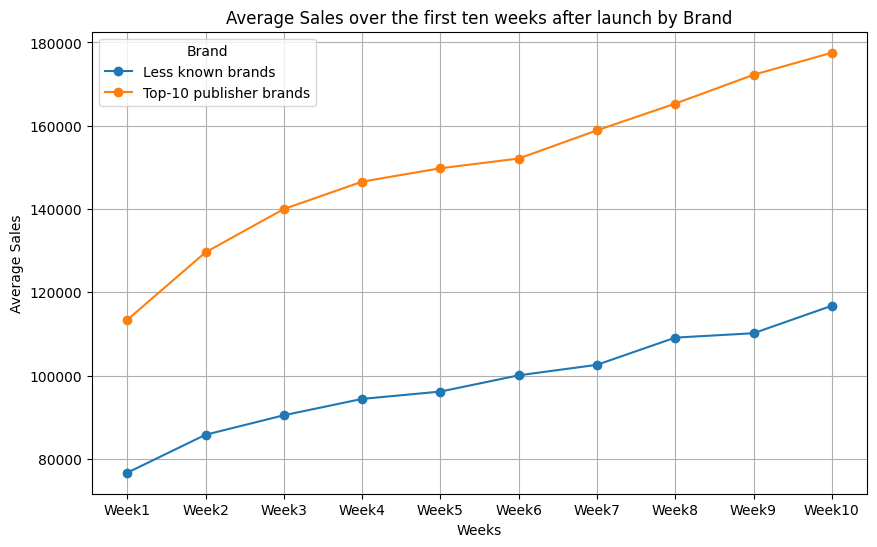

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

weeks = ['Week1', 'Week2', 'Week3', 'Week4', 'Week5', 'Week6', 'Week7', 'Week8', 'Week9', 'Week10']
grouped = df.groupby('Brand')[weeks].mean()
# Transpose the DataFrame for easier plotting
grouped = grouped.T

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped[0], marker='o', label='Less known brands')
plt.plot(grouped.index, grouped[1], marker='o', label='Top-10 publisher brands')

# Adding titles and labels
plt.title('Average Sales over the first ten weeks after launch by Brand')
plt.xlabel('Weeks')
plt.ylabel('Average Sales')
plt.legend(title='Brand')
plt.grid(True)

# Show the plot
print('Figure 4. Sales over the first ten weeks after product launch by Brand')
plt.show()

Sales over the first ten weeks after product launch by beta testing strategy


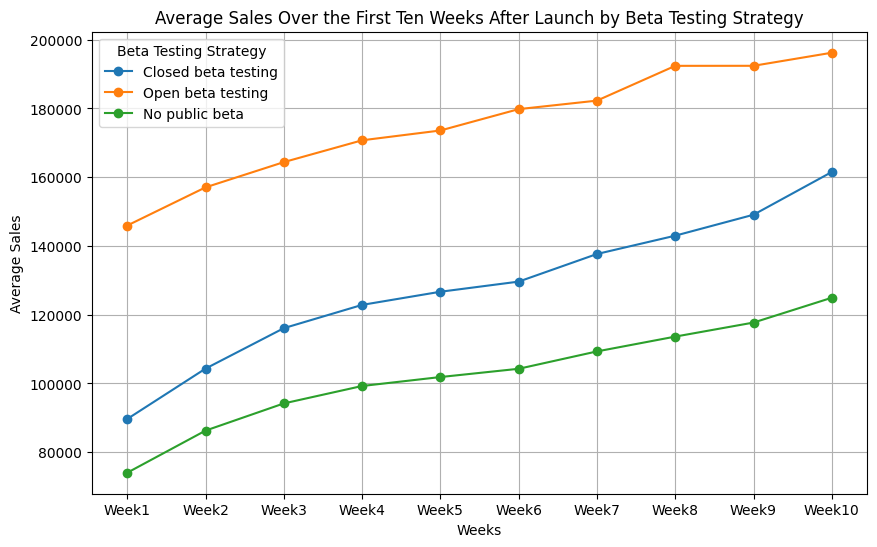

In [36]:
weeks = ['Week1', 'Week2', 'Week3', 'Week4', 'Week5', 'Week6', 'Week7', 'Week8', 'Week9', 'Week10']
grouped_closed = df.groupby('closed')[weeks].mean()
grouped_open = df.groupby('open')[weeks].mean()

# Transpose the DataFrames for easier plotting
grouped_closed = grouped_closed.T
grouped_open = grouped_open.T

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(grouped_closed.index, grouped_closed[1], marker='o', label='Closed beta testing')
plt.plot(grouped_open.index, grouped_open[1], marker='o', label='Open beta testing') 
plt.plot(grouped_open.index, grouped_open[0], marker='o', label='No public beta')

# Adding titles and labels
plt.title('Average Sales Over the First Ten Weeks After Launch by Beta Testing Strategy')
plt.xlabel('Weeks')
plt.ylabel('Average Sales')
plt.legend(title='Beta Testing Strategy')
plt.grid(True)

# Show the plot
print('Sales over the first ten weeks after product launch by beta testing strategy')
plt.show()

<b>#Analyze the effect of beta testing on weekly sales</b>

In [37]:
#log-transform weekly sales data
for i in range(1, 11):
    week_col = f'Week{i}'
    log_week_col = f'lg{week_col}'
    # Use np.log1p to handle zero sales values (log(1 + x) instead of log(x))
    df2[log_week_col] = np.log1p(df2[week_col])

# Display the transformed DataFrame
print(df2.head())

                          Name  Rating  Price  Userscore  User_Reviews  \
0                     Okami HD    92.0  19.99        7.7         140.0   
1                STEINS;GATE 0    90.0  34.99        8.1           7.0   
2                    Bayonetta    90.0  19.99        8.2         343.0   
3  Out of the Park Baseball 19    90.0  19.99        5.0           4.0   
4                  Opus Magnum    90.0  19.99        8.3           8.0   

                   Publisher  Facebook  Brand  Franchise   Sales  ...  \
0                     CAPCOM   1187880      1          0  167000  ...   
1             Spike Chunsoft     15132      0          1   36000  ...   
2                       SEGA   1762888      1          0  623000  ...   
3  Out of the Park Developme      8062      0          1  124000  ...   
4                Zachtronics      1273      0          0  122000  ...   

     lgWeek1    lgWeek2    lgWeek3    lgWeek4    lgWeek5    lgWeek6  \
0  11.211834  11.373675  11.451061  11.532738

C:\Users\ge6256\AppData\Local\Temp\ipykernel_3344\3704067718.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[log_week_col] = np.log1p(df2[week_col])
C:\Users\ge6256\AppData\Local\Temp\ipykernel_3344\3704067718.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[log_week_col] = np.log1p(df2[week_col])
C:\Users\ge6256\AppData\Local\Temp\ipykernel_3344\3704067718.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [38]:
#Fit the Heckman model WEEKLY OPEN SALES for each week and store the results
results = {}
for i in range(1, 11):
    week_col = f'lgWeek{i}'
    # Drop rows with missing values for the current week
    df2_week = df2.dropna(subset=[week_col])
    model2 = sm.OLS(df2_week[week_col], df2_week[['open', 'Brand', 'Brand_open', 'Heckman_Lambda2']]).fit()
    results[week_col] = model2

#Create a summary table with WEEKLY OPEN SALES coefficients and significance levels
coefficients = ['open', 'Brand', 'Brand_open', 'Heckman_Lambda2']
summary_table = pd.DataFrame(columns=['Variable'] + [f'Week{i}' for i in range(1, 11)])

for coef_name in coefficients:
    coef_values = []
    for week_col in results.keys():
        result = results[week_col]
        coef_value = result.params.get(coef_name, '-')
        if isinstance(coef_value, (int, float)):
            coef_value = round(coef_value, 3)
            p_value = result.pvalues.get(coef_name, 1.0)
            significance_level = ''
            if p_value < 0.01:
                significance_level = '***'
            elif p_value < 0.05:
                significance_level = '**'
            elif p_value < 0.1:
                significance_level = '*'
            coef_values.append(f"{coef_value:.3f}{significance_level}")
        else:
            coef_values.append('-')
    summary_table.loc[len(summary_table)] = [coef_name] + coef_values

# Display the summary table
print(summary_table)

          Variable      Week1      Week2      Week3      Week4      Week5  \
0             open   8.687***   8.691***   8.730***   8.765***   8.815***   
1            Brand   4.925***   4.911***   5.109***   5.196***   5.266***   
2       Brand_open  -5.892***  -5.728***  -5.894***  -5.812***  -5.934***   
3  Heckman_Lambda2   0.686***   0.706***   0.705***   0.708***   0.716***   

       Week6      Week7      Week8      Week9     Week10  
0   8.790***   8.814***   8.883***   8.805***   8.787***  
1   5.214***   5.289***   5.282***   5.237***   5.207***  
2  -5.867***  -5.907***  -5.967***  -5.888***  -5.890***  
3   0.731***   0.733***   0.738***   0.752***   0.770***  


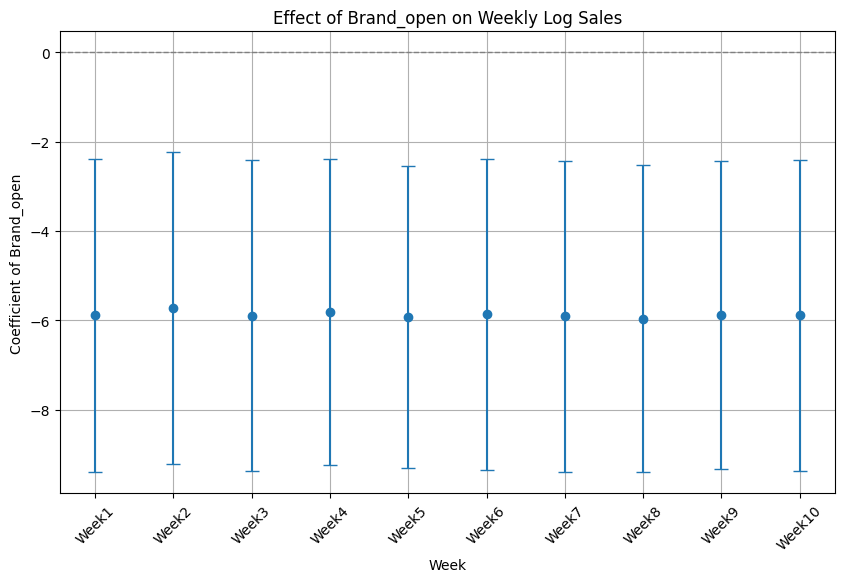

In [39]:
#Plot the WEEKLY OPEN SALES coefficients of Brand_open with confidence intervals
weeks = [f'Week{i}' for i in range(1, 11)]
coefficients = [results[f'lg{week}'].params['Brand_open'] for week in weeks]
conf_intervals = [results[f'lg{week}'].conf_int().loc['Brand_open'] for week in weeks]

lower_bounds = [conf[0] for conf in conf_intervals]
upper_bounds = [conf[1] for conf in conf_intervals]

plt.figure(figsize=(10, 6))
plt.errorbar(weeks, coefficients, yerr=[np.array(coefficients) - np.array(lower_bounds), np.array(upper_bounds) - np.array(coefficients)], fmt='o', capsize=5)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Week')
plt.ylabel('Coefficient of Brand_open')
plt.title('Effect of Brand_open on Weekly Log Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [40]:
#Fit the WEEKLY CLOSED SALES Heckman model for each week and store the results
resultsc = {}
for i in range(1, 11):
    week_col = f'lgWeek{i}'
    # Drop rows with missing values for the current week
    df2_week = df2.dropna(subset=[week_col])
    model = sm.OLS(df2_week[week_col], df2_week[['closed', 'Brand', 'Brand_closed', 'Heckman_Lambda']]).fit()
    resultsc[week_col] = model

#Create a summary table with WEEKLY OPEN SALES coefficients and significance levels
coefficients = ['closed', 'Brand', 'Brand_closed', 'Heckman_Lambda']
summary_table = pd.DataFrame(columns=['Variable'] + [f'Week{i}' for i in range(1, 11)])

for coef_name in coefficients:
    coef_values = []
    for week_col in results.keys():
        result = resultsc[week_col]
        coef_value = result.params.get(coef_name, '-')
        if isinstance(coef_value, (int, float)):
            coef_value = round(coef_value, 3)
            p_value = result.pvalues.get(coef_name, 1.0)
            significance_level = ''
            if p_value < 0.01:
                significance_level = '***'
            elif p_value < 0.05:
                significance_level = '**'
            elif p_value < 0.1:
                significance_level = '*'
            coef_values.append(f"{coef_value:.3f}{significance_level}")
        else:
            coef_values.append('-')
    summary_table.loc[len(summary_table)] = [coef_name] + coef_values

# Display the summary table
print('Table X. Effect of closed beta testing on weekly sales')
print(summary_table)

Table X. Effect of closed beta testing on weekly sales
         Variable     Week1     Week2     Week3     Week4     Week5     Week6  \
0          closed  3.373***  3.382***  3.433***  3.635***  3.747***  3.640***   
1           Brand  2.122***  2.182***  2.221***  2.448***  2.537***  2.397***   
2    Brand_closed    -0.607    -0.619    -0.776    -1.421    -1.579    -1.425   
3  Heckman_Lambda  1.979***  2.005***  2.014***  2.000***  1.985***  2.029***   

      Week7     Week8     Week9    Week10  
0  3.673***  3.664***  3.645***  3.701***  
1  2.394***  2.318***  2.314***  2.484***  
2    -1.417    -1.383    -1.371    -1.488  
3  2.031***  2.058***  2.073***  2.056***  


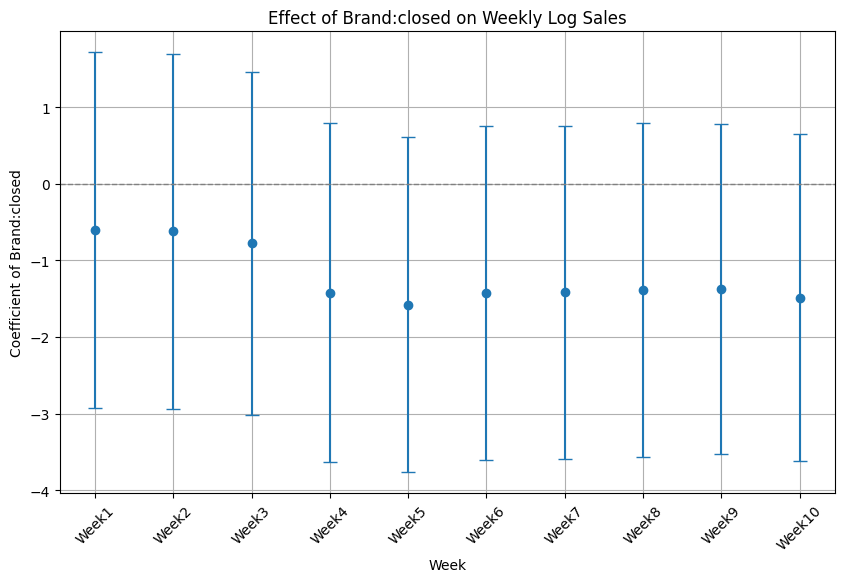

In [41]:
#Plot the WEEKLY OPEN SALES coefficients of Brand_open with confidence intervals
weeks = [f'Week{i}' for i in range(1, 11)]
coefficients = [resultsc[f'lg{week}'].params['Brand_closed'] for week in weeks]
conf_intervals = [resultsc[f'lg{week}'].conf_int().loc['Brand_closed'] for week in weeks]

lower_bounds = [conf[0] for conf in conf_intervals]
upper_bounds = [conf[1] for conf in conf_intervals]

plt.figure(figsize=(10, 6))
plt.errorbar(weeks, coefficients, yerr=[np.array(coefficients) - np.array(lower_bounds), np.array(upper_bounds) - np.array(coefficients)], fmt='o', capsize=5)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Week')
plt.ylabel('Coefficient of Brand:closed')
plt.title('Effect of Brand:closed on Weekly Log Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [42]:
# Plot the coefficients of open and closed with confidence intervals as shaded areas
# Extract coefficients and confidence intervals for open
coefficients_open = [results[f'lg{week}'].params['open'] for week in weeks]
conf_intervals_open = [results[f'lg{week}'].conf_int().loc['open'] for week in weeks]
lower_bounds_open = [conf[0] for conf in conf_intervals_open]
upper_bounds_open = [conf[1] for conf in conf_intervals_open]

# Extract coefficients and confidence intervals for closed
coefficients_closed = [resultsc[f'lg{week}'].params['closed'] for week in weeks]
conf_intervals_closed = [resultsc[f'lg{week}'].conf_int().loc['closed'] for week in weeks]
lower_bounds_closed = [conf[0] for conf in conf_intervals_closed]
upper_bounds_closed = [conf[1] for conf in conf_intervals_closed]

plt.figure(figsize=(12, 8))

# Plot open
plt.plot(x, coefficients_open, label='open', color='blue')
plt.fill_between(x, lower_bounds_open, upper_bounds_open, color='blue', alpha=0.2)

# Plot closed
plt.plot(x, coefficients_closed, label='closed', color='red')
plt.fill_between(x, lower_bounds_closed, upper_bounds_closed, color='red', alpha=0.2)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Week')
plt.ylabel('log sales coefficient')
plt.title('Effect of open and closed beta testing on Weekly Log Sales, NON-TOP-10 brands, ten weeks after product launch')
plt.legend()
plt.xticks(ticks=x, labels=weeks, rotation=45)
plt.grid(True)
plt.show()

NameError: name 'x' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Step 5: Plot the coefficients of Brand_open and Brand_closed with confidence intervals as shaded areas
weeks = [f'Week{i}' for i in range(1, 11)]
x = np.arange(1, 11)

# Extract coefficients and confidence intervals for Brand_open
coefficients_open = [results[f'lg{week}'].params['Brand_open'] for week in weeks]
conf_intervals_open = [results[f'lg{week}'].conf_int().loc['Brand_open'] for week in weeks]
lower_bounds_open = [conf[0] for conf in conf_intervals_open]
upper_bounds_open = [conf[1] for conf in conf_intervals_open]

# Extract coefficients and confidence intervals for Brand_closed
coefficients_closed = [resultsc[f'lg{week}'].params['Brand_closed'] for week in weeks]
conf_intervals_closed = [resultsc[f'lg{week}'].conf_int().loc['Brand_closed'] for week in weeks]
lower_bounds_closed = [conf[0] for conf in conf_intervals_closed]
upper_bounds_closed = [conf[1] for conf in conf_intervals_closed]

plt.figure(figsize=(12, 8))

# Plot Brand_open
plt.plot(x, coefficients_open, label='Brand_open', color='blue')
plt.fill_between(x, lower_bounds_open, upper_bounds_open, color='blue', alpha=0.2)

# Plot Brand_closed
plt.plot(x, coefficients_closed, label='Brand_closed', color='red')
plt.fill_between(x, lower_bounds_closed, upper_bounds_closed, color='red', alpha=0.2)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Week')
plt.ylabel('Coefficient')
plt.title('Effect of Brand:open and Brand:closed interactions on Weekly Log Sales, TOP-10 brands')
plt.legend()
plt.xticks(ticks=x, labels=weeks, rotation=45)
plt.grid(True)
plt.show()

<b>3SLS estimation for system of equations</b>

In [ ]:
#3SLS wih dictionaries OPEN beta
from linearmodels import IV3SLS
Sales = {
    "dependent": df2[["lgsales"]],
    "exog": df2[["Brand", "Brand_open", "Price", "Rating", "Year_Dummy", "Season_Fall", "Season_Spring", "Season_Summer"]],
    "endog": df2[["open", "Reviews"]],
    "instruments": df2[["genre_open", "Facebook"]],
}

WOM = {
    "dependent": df2[["lgwom"]],
    "exog": df2[["Brand", "Brand_open", "Price", "Rating", "Year_Dummy", "Season_Fall", "Season_Spring", "Season_Summer"]],
    "endog": df2[["open", "Sales"]],
    "instruments": df2[["genre_open", "Franchise"]],
}

equations = dict(Sales=Sales, WOM=WOM)
system_3sls = IV3SLS(equations)
system_3sls_res = system_3sls.fit(cov_type="unadjusted")
print(system_3sls_res)

In [ ]:
import numpy as np

def first_stage_f_stat(endog, exog, instruments):
    # Combine exog and instruments into one DataFrame
    X_full = pd.concat([exog, instruments], axis=1)
    
    # Fit the first-stage regression model
    model_full = sm.OLS(endog, sm.add_constant(X_full)).fit()
    model_reduced = sm.OLS(endog, sm.add_constant(exog)).fit()
    
    # Calculate the sum of squared residuals for both models
    ssr_full = np.sum(model_full.resid ** 2)
    ssr_reduced = np.sum(model_reduced.resid ** 2)
    
    # Number of instruments and endogenous regressors
    num_instruments = instruments.shape[1]
    num_obs = endog.shape[0]
    num_exog = exog.shape[1]
    
    # Calculate the F-statistic
    numerator = (ssr_reduced - ssr_full) / num_instruments
    denominator = ssr_full / (num_obs - num_exog - num_instruments - 1)
    f_stat = numerator / denominator
    
    return f_stat

# Prepare the data
Y_sales = df2["open"]
X_sales = df2[["Brand", "Brand_open", "Price", "Rating", "Year_Dummy", "Season_Fall", "Season_Spring", "Season_Summer"]]
Z_sales = df2[["genre_open"]]

Y_open_wom = df2["open"]
X_open_wom = df2[["Brand", "Brand_open", "Price", "Rating", "Year_Dummy", "Season_Fall", "Season_Spring", "Season_Summer"]]
Z_open_wom = df2[["genre_open"]]

# Calculate the Cragg-Donald F-statistic for each first-stage regression
f_stat_open_sales = first_stage_f_stat(Y_sales, X_sales, Z_sales)
print("First-stage F-statistic for 'open' in Sales equation:", f_stat_open_sales)

f_stat_open_wom = first_stage_f_stat(Y_open_wom, X_open_wom, Z_open_wom)
print("First-stage F-statistic for 'open' in WOM equation:", f_stat_open_wom)

In [ ]:
#3SLS wih dictionaries CLOSED
Salesc = {
    "dependent": df2[["lgsales"]],
    "exog": df2[["Brand", "Brand_closed", "Price", "Rating", "Year_Dummy", "Season_Fall", "Season_Spring", "Season_Summer"]],
    "endog": df2[["closed", "Reviews"]],
    "instruments": df2[["genre_closed", "Facebook"]],
}

WOMc = {
    "dependent": df2[["lgwom"]],
    "exog": df2[["Brand", "Brand_closed", "Price", "Rating", "Year_Dummy", "Season_Fall", "Season_Spring", "Season_Summer"]],
    "endog": df2[["closed", "Sales"]],
    "instruments": df2[["genre_closed", "Franchise"]],
}


equationsc = dict(Salesc=Salesc, WOMc=WOMc)
system_3slsc = IV3SLS(equationsc)
system_3sls_resc = system_3slsc.fit(cov_type="robust")
print(system_3sls_resc)

In [49]:
#GMM estimation with weaker instruments assumptions SAlES OPEN
from linearmodels.system import IVSystemGMM

equations = {
    'Sales': 'lgsales ~ [open ~ genre_open] + Brand + Brand_open + Reviews + Price + Rating + Year_Dummy + Season_Fall + Season_Spring + Season_Summer',
    'WOM': 'lgwom ~ open + Brand + Brand_open + [Sales ~ Price + Rating + Year_Dummy + Season_Fall + Season_Spring + Season_Summer]'
}
# Fit the model
system_gmm = IVSystemGMM.from_formula(equations, df2, weight_type="unadjusted")
system_gmm_res = system_gmm.fit(cov_type="unadjusted")

# Display the results
print(system_gmm_res)

                    System 2-Step System GMM Estimation Summary                    
Estimator:          2-Step System GMM   Overall R-squared:                   0.7214
No. Equations.:                     2   McElroy's R-squared:                -6.7929
No. Observations:                 330   Judge's (OLS) R-squared:            -22.609
Date:                Wed, Jun 18 2025   Berndt's R-squared:                 -401.18
Time:                        13:52:48   Dhrymes's R-squared:                 0.4522
                                        Cov. Estimator:                  unadjusted
                                        Num. Constraints:                      None
                   Equation: Sales, Dependent Variable: lgsales                  
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Brand             1.3030     0.4618     2.8217     0.0048      0.3979      2.2080


In [51]:
#GMM estimation with weaker instruments assumptions SAlES CLOSED
from linearmodels.system import IVSystemGMM

equationsc = {
    'Sales': 'lgsales ~ [closed ~ genre_closed] + Brand + Brand_closed + Reviews + Price + Rating + Year_Dummy + Season_Fall + Season_Spring + Season_Summer',
    'WOM': 'lgwom ~ closed + Brand + Brand_closed + [Sales ~ Price + Rating + Reviews + Year_Dummy + Season_Fall + Season_Spring + Season_Summer]',
}
# Fit the model
system_gmmc = IVSystemGMM.from_formula(equationsc, df2, weight_type="robust")
system_gmm_resc = system_gmmc.fit(cov_type="robust")

# Display the results
print(system_gmm_resc)

                    System 2-Step System GMM Estimation Summary                    
Estimator:          2-Step System GMM   Overall R-squared:                   0.7848
No. Equations.:                     2   McElroy's R-squared:                -18.992
No. Observations:                 330   Judge's (OLS) R-squared:            -17.241
Date:                Wed, Jun 18 2025   Berndt's R-squared:                 -399.09
Time:                        13:54:25   Dhrymes's R-squared:                 0.7241
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                   Equation: Sales, Dependent Variable: lgsales                  
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Brand             4.8613     1.9982     2.4329     0.0150      0.9450      8.7776


In [81]:
#Wrong Specification?
#3SLS analysis for the system of equations for OPEN beta : SALES Long with Marketing mix variables
from linearmodels import IV3SLS
formula = {
    'Sales': 'lgsales ~ 1 + open + Brand + Brand_open + Reviews + Price + Rating + Year_Dummy + Season_Fall + Season_Spring + Season_Summer',
    'Beta': 'open ~ 1 + genre_open + Heckman_Lambda2',
    'Brand': 'Brand ~ 1 + Facebook',
    'WOM': 'Reviews ~ 1 + open + Brand + Brand_open + lgsales + Price + Rating + Year_Dummy + Season_Fall + Season_Spring + Season_Summer'
}

# Fit the model
model3sls = IV3SLS.from_formula(formula, data=df2)
results3sls = model3sls.fit()

# Display the results
print(results3sls)

                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.4415
No. Equations.:                     4   McElroy's R-squared:                 0.7367
No. Observations:                 330   Judge's (OLS) R-squared:             0.4415
Date:                Wed, Jun 18 2025   Berndt's R-squared:                  0.8121
Time:                        13:25:42   Dhrymes's R-squared:                 0.4415
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                   Equation: Sales, Dependent Variable: lgsales                  
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Intercept         11.249     0.3420     32.897     0.0000      10.579      11.920
